In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [28]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [29]:
# 날짜 타입으로 변경해서 년, 월, 일, 시간, 요일 컬럼 추가
train['datetime']= pd.to_datetime(train['datetime'])
train['dt_year'] = train['datetime'].dt.year
train['dt_month'] = train['datetime'].dt.month
train['dt_day'] = train['datetime'].dt.day
train['dt_hour'] = train['datetime'].dt.hour
train['dt_yoil'] = train['datetime'].dt.dayofweek

In [30]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [31]:
# 컬럼 삭제
train = train.drop(['datetime', 'casual', 'registered'], axis=1)

In [32]:
# 연도별 대여량
train.groupby('dt_year')['count'].sum()

dt_year
2011     781979
2012    1303497
Name: count, dtype: int64

<AxesSubplot:xlabel='dt_year'>

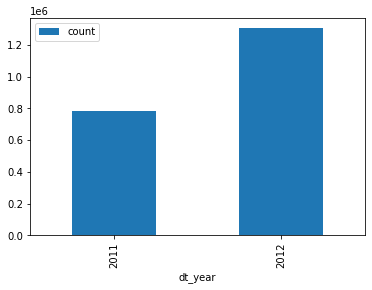

In [33]:
df = pd.DataFrame(train.groupby('dt_year')['count'].sum())
df.plot(kind='bar')

<AxesSubplot:xlabel='dt_month'>

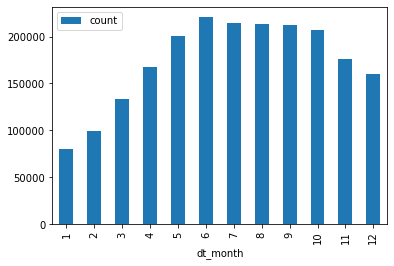

In [34]:
# 월별 대여량
df = pd.DataFrame(train.groupby('dt_month')['count'].sum())
df.plot(kind='bar')

<AxesSubplot:xlabel='dt_hour'>

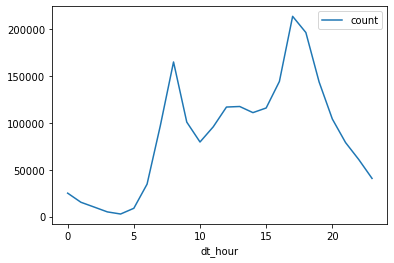

In [38]:
# 시간별 대여량
df = pd.DataFrame(train.groupby('dt_hour')['count'].sum())
df.plot(kind='line')

<AxesSubplot:xlabel='dt_yoil'>

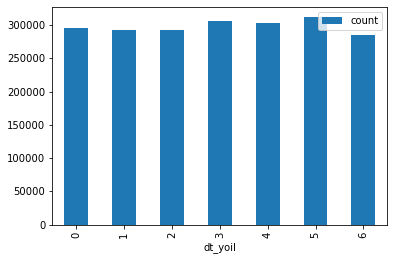

In [36]:
# 요일별 대여량
df = pd.DataFrame(train.groupby('dt_yoil')['count'].sum())
df.plot(kind='bar')

In [37]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [39]:
# 상관관계
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601,-0.002283
dt_year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234,-0.003785


<AxesSubplot:>

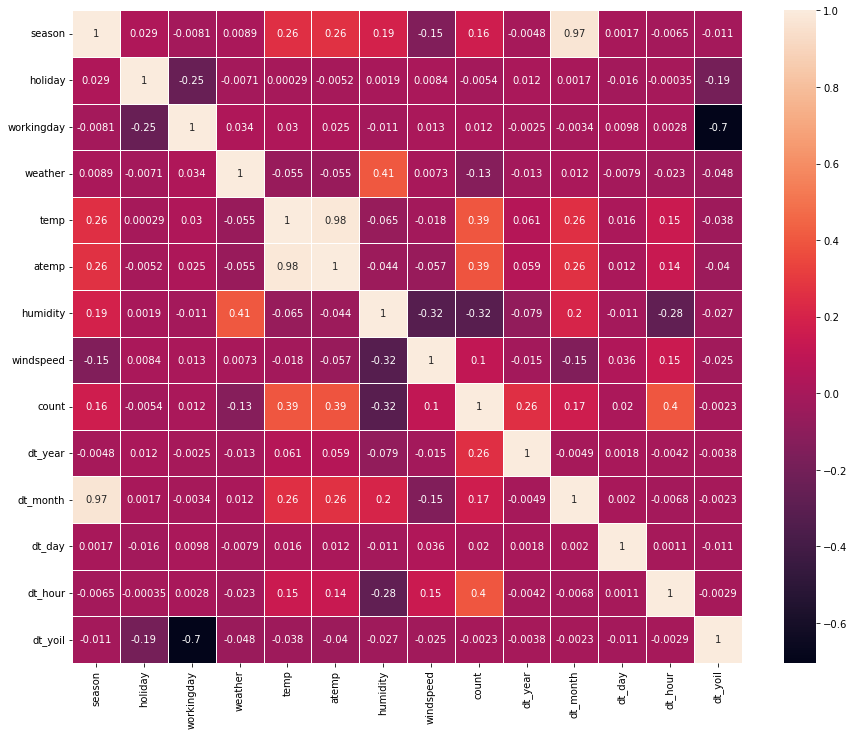

In [43]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(), annot=True, linewidths=1)

In [44]:
# 3개의 모델 : 랜덤포레스트, 그라디언트부스팅, xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

In [46]:
# 데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train.drop('count', axis=1), 
                                                    train['count'], 
                                                    test_size=0.3, 
                                                    random_state=42)

In [47]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((7620, 13), (3266, 13), (7620,), (3266,))

In [58]:
# evaluation 함수
import numpy as np
def rmsle(y, y_):
    a = np.array([np.log(v+1) for v in y])
    p = np.array([np.log(v+1) for v in y_])
    c = (p-a)**2
    return np.sqrt(np.mean(c))

In [65]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(train_x, train_y)
pred = rf.predict(test_x)
pred

array([138.73 ,  32.036, 161.502, ..., 241.844, 172.822,   2.888])

In [66]:
rmsle(test_y, pred)

0.32940159171224337

In [75]:
# 그라디언트부스트
gr = GradientBoostingRegressor()
gr.fit(train_x, np.log(train_y)) # log를 취하지 않으면 음수값이 나와서 로그를 취했을때 nan이 나옴
pred = gr.predict(test_x)
rmsle(test_y, np.exp(pred))

0.38024541832449876

In [84]:
# xgboost
xgb = xgboost.XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05)
xgb.fit(train_x, np.log(train_y)) # log를 취하지 않으면 음수값이 나와서 로그를 취했을때 nan이 나옴
pred = xgb.predict(test_x)
rmsle(test_y, np.exp(pred))

0.28448831466396257

In [86]:
# 테스트 데이터 불러와서 전처리 작업
test = pd.read_csv('test.csv')
test['datetime']= pd.to_datetime(test['datetime'])
test['dt_year'] = test['datetime'].dt.year
test['dt_month'] = test['datetime'].dt.month
test['dt_day'] = test['datetime'].dt.day
test['dt_hour'] = test['datetime'].dt.hour
test['dt_yoil'] = test['datetime'].dt.dayofweek
test = test.drop(['datetime'], axis=1)

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   dt_year     6493 non-null   int64  
 9   dt_month    6493 non-null   int64  
 10  dt_day      6493 non-null   int64  
 11  dt_hour     6493 non-null   int64  
 12  dt_yoil     6493 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 659.6 KB


In [90]:
# 전체 데이터로 재학습
xgb = xgboost.XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05)
xgb.fit(train.drop('count', axis=1), np.log(train['count']))

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [92]:
pred = xgb.predict(test)

In [96]:
test2 = pd.read_csv('test.csv')
output = pd.DataFrame({
    'datetime': test2['datetime'],
    'count' : np.exp(pred)
})
output

,datetime,count
0,2011-01-20 00:00:00,12.042007
1,2011-01-20 01:00:00,5.158570
2,2011-01-20 02:00:00,3.850155
3,2011-01-20 03:00:00,2.529748
4,2011-01-20 04:00:00,1.801540
...,...,...
6488,2012-12-31 19:00:00,248.813843
6489,2012-12-31 20:00:00,165.538422
6490,2012-12-31 21:00:00,121.842255
6491,2012-12-31 22:00:00,87.254005


In [97]:
output.to_csv('pred.csv', index=False)

In [98]:
pd.read_csv('pred.csv')

,datetime,count
0,2011-01-20 00:00:00,12.042007
1,2011-01-20 01:00:00,5.158570
2,2011-01-20 02:00:00,3.850155
3,2011-01-20 03:00:00,2.529748
4,2011-01-20 04:00:00,1.801540
...,...,...
6488,2012-12-31 19:00:00,248.813840
6489,2012-12-31 20:00:00,165.538420
6490,2012-12-31 21:00:00,121.842255
6491,2012-12-31 22:00:00,87.254005
